In [202]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import gmaps

from config import gkey

gmaps.configure(api_key=gkey)

In [203]:
df1 = pd.read_csv("Resources/Crimes_LA.csv")
rent1 = pd.read_csv("Resources/LA_rentmedianf.csv")
rent1.head()

,Median Rent 2016,Tract Number,Neighborhood,Location
0,900,212305,Koreatown,"(34.056107, -118.298204)"
1,1391,101110,Tujunga,"(34.2595555, -118.293602)"
2,1924,101122,Tujunga,"(34.267357, -118.29024)"
3,1141,101210,Tujunga,"(34.251998, -118.2926875)"
4,1123,101220,Tujunga,"(34.2511895, -118.281014)"


In [204]:
df1["Variable"] = df1["Variable"].replace(
    {"Part I Violent Crimes": "Violent Crimes", "Part I Property Crimes": "Property Crimes"})

In [205]:
df = df1[df1.Year == 2016]
pc = df.loc[(df.Variable=="Property Crimes")]
vc = df.loc[(df.Variable=="Violent Crimes")]
pc.head(1)

,Policy Area,Dataset,Variable,Year,Count,Tract,Tract Number,Neighborhood,GEOID,Location,Latitude,Longitude,Row ID,Date
4,Public Safety,Part I Crimes,Property Crimes,2016,29.012024,"Census Tract 5540.01, Los Angeles County, Cali...",554001,Bellflower,1400000US06037554001,"(33.898299, -118.1330425)",33.898299,-118.133043,Part_I_Property_Crimes_2016_1400000US06037554001,1/1/16


In [206]:
#Access the Variable column to locate "Property/Violent" Crimes separately 
df = df1[df1.Year == 2016]
pc = df.loc[(df.Variable=="Property Crimes")]
vc = df.loc[(df.Variable=="Violent Crimes")]
violent1 = vc[["Neighborhood", "Variable", "Count", 
               "Tract Number", "Latitude", "Longitude"]]
prop1 = pc[["Neighborhood", "Variable", "Count", 
            "Tract Number", "Latitude", "Longitude"]]
rent = rent1[["Median Rent 2016", "Tract Number"]]
#Merge both datasets on "Tract Number"
finalp = prop1.merge(rent, on="Tract Number", how="left")
finalv = violent1.merge(rent, on="Tract Number", how="left")

In [207]:
violent1 = vc[["Neighborhood", "Variable", "Count", "Tract Number", "Latitude", "Longitude"]]
prop1 = pc[["Neighborhood", "Variable", "Count", "Tract Number", "Latitude", "Longitude"]]
rent = rent1[["Median Rent 2016", "Tract Number"]]
violent1.head(5)

,Neighborhood,Variable,Count,Tract Number,Latitude,Longitude
5,Bellflower,Violent Crimes,5.913979,554301,33.883136,-118.146945
8,Pacoima,Violent Crimes,8.526603,104403,34.258909,-118.434539
14,Granada Hills,Violent Crimes,0.000000,106641,34.298025,-118.509153
31,Lake Balboa,Violent Crimes,3.742982,131200,34.214754,-118.514238
34,Green Meadows,Violent Crimes,10.821717,240020,33.954224,-118.263804


In [208]:
finalp = prop1.merge(rent, on="Tract Number", how="left")
finalpc = finalp[["Neighborhood", "Variable", "Tract Number", "Count", "Median Rent 2016", "Latitude", "Longitude"]]
finalpc = finalpc.dropna(how="any")
finalpc["Count"].describe()


count    1593.000000
mean       26.199044
std        66.945985
min         0.000000
25%        13.095749
50%        19.283747
75%        28.030994
max      2506.849400
Name: Count, dtype: float64

In [209]:
finalv = violent1.merge(rent, on="Tract Number", how="left")
finalvc = finalv[["Neighborhood", "Variable", "Tract Number", "Count", "Median Rent 2016", "Latitude", "Longitude"]]
finalvc = finalvc.dropna(how="any")
finalvc["Count"].describe()


count    1593.000000
mean        6.152635
std        11.133959
min         0.000000
25%         1.939864
50%         3.751465
75%         7.315799
max       301.369870
Name: Count, dtype: float64

In [210]:
#Property Crime Values
prent_min = finalpc.sort_values(by =["Median Rent 2016"], ascending = True)
prent_max = finalpc.sort_values(by =["Median Rent 2016"], ascending = False)

#Violent Crime Values
vrent_min = finalvc.sort_values(by =["Median Rent 2016"], ascending = True)
vrent_max = finalvc.sort_values(by =["Median Rent 2016"], ascending = False)

plow_count = prent_min["Count"][0:7]
ptop_count = prent_max["Count"][0:7]
vlow_count = vrent_min["Count"][0:7]
vtop_count = vrent_max["Count"][0:7]

vrent_max.head(7)

,Neighborhood,Variable,Tract Number,Count,Median Rent 2016,Latitude,Longitude
273,Studio City,Violent Crimes,143901,3.302666,3500.0,34.132849,-118.394762
1459,Rolling Hills,Violent Crimes,670500,0.000000,3500.0,33.760874,-118.347924
826,Rancho Palos Verdes,Violent Crimes,670702,0.372648,3500.0,33.751372,-118.328527
591,Calabasas,Violent Crimes,800101,0.363042,3500.0,34.135498,-118.629556
851,Porter Ranch,Violent Crimes,108101,0.406174,3500.0,34.280038,-118.541372
298,Unincorporated Santa Monica Mountains,Violent Crimes,800202,0.337041,3500.0,34.111882,-118.672485
831,Pacific Palisades,Violent Crimes,262601,0.285959,3500.0,34.073806,-118.556781


Text(0.5, 1.0, 'Lowest Rent-Priced Neighborhoods vs. Crime Counts')

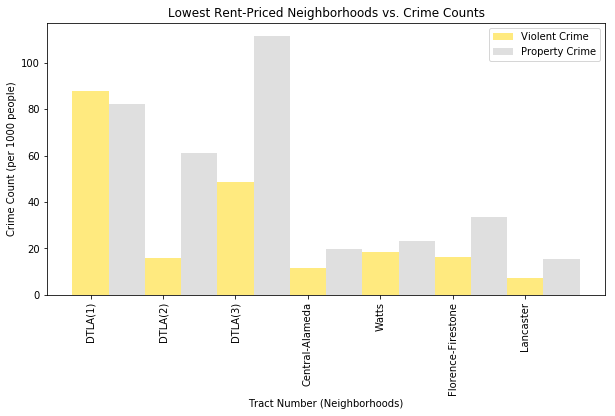

In [211]:
#Property Crime Bar Graph
plt.figure(figsize=(10, 5))
neighborhoods = ["DTLA(1)", "DTLA(2)", "DTLA(3)", "Central-Alameda", "Watts", "Florence-Firestone", "Lancaster"]
ind = np.arange(len(neighborhoods))
width = .5
plt.bar(ind, vlow_count, width =.5, color="gold", alpha=0.5, align="center", label="Violent Crime")
plt.bar(ind + width, plow_count, width =.5, color="silver", alpha=0.5, align="center", label="Property Crime")

plt.xticks(ind, neighborhoods, rotation="vertical")

plt.ylabel("Crime Count (per 1000 people)")
plt.xlabel("Tract Number (Neighborhoods)")
plt.legend(loc="upper right")
plt.title("Lowest Rent-Priced Neighborhoods vs. Crime Counts")

Text(0.5, 1.0, 'Highest Rent-Priced Neighborhoods vs. Crime Counts')

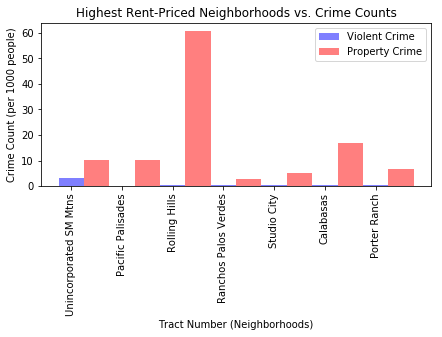

In [212]:
#Top Rent Crime Bar Graph
plt.figure(figsize=(7, 3))
neighborhoods = ["Unincorporated SM Mtns", "Pacific Palisades", "Rolling Hills", "Ranchos Palos Verdes", 
                 "Studio City", "Calabasas", "Porter Ranch"]
ind = np.arange(len(neighborhoods))
width = .5
plt.bar(ind, vtop_count, width =.5, color="blue", alpha=0.5, align="center", label="Violent Crime")
plt.bar(ind + width, ptop_count, width =.5, color="red", alpha=0.5, align="center", label="Property Crime")

plt.xticks(ind, neighborhoods, rotation="vertical")

plt.ylabel("Crime Count (per 1000 people)")
plt.xlabel("Tract Number (Neighborhoods)")

plt.legend(loc="upper right")
plt.title("Highest Rent-Priced Neighborhoods vs. Crime Counts")


In [213]:
#Violent Crime Heatmap

locations = finalvc[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
violent_count = finalvc["Count"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=violent_count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 50
heat_layer.point_radius = .01

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [214]:
#Property Crime Heatmap

locations = finalpc[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
property_count = finalpc["Count"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=property_count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 50
heat_layer.point_radius = .01

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))

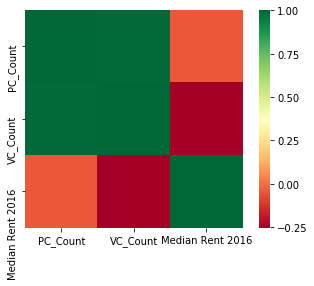

In [215]:
import seaborn as sns

finalcombined = finalp.merge(violent1, on="Tract Number", how="left")
finalcombined
finalcombined = finalcombined.rename(columns={"Count_x": "PC_Count", "Count_y": "VC_Count"})
finalcombined.head()
finalcombined1 = finalcombined[["PC_Count", "VC_Count", "Median Rent 2016"]]
finalcombined1.head()

sns.heatmap(finalcombined1.corr(), square=True, cmap='RdYlGn')
# plt.savefig('air_park_rent_correlation.png')

In [216]:
x = finalpc["Count"]
y = finalpc["Median Rent 2016"]

np.cov(x,y)

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(x, y)
covariance_matrix

# Extract covariance of latitude and Max Temperature
pol_lav_covariance = covariance_matrix[0,1]
pol_lav_covariance

if (pol_lav_covariance < 0):
   print(f"The covariance for property crime and median rent is 
         {round(pol_lav_covariance,4)}, and is negative. 
         \nThis states that as one variable increases, the other decreases.")
else:
   print(f"The covariance for property crime and median rent is 
         {round(pol_lav_covariance,4)}, is positive. \nThis states 
         that these variable tend to either increase or decrease together.")

The covariance for property crime and median rent is -1586.7586, and is negative. 
This states that as one variable increases, the other decreases.


In [238]:
x = finalpc["Count"]
y = finalpc["Median Rent 2016"]

def pearson_r(x, y):

   # Compute correlation matrix: corr_mat
   corr_mat = np.corrcoef(x, y)

   # Return entry [0,1]
   return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(x, y)

# Print the result
print(r)

if (r < 0):
   print(f"Since r = {round(r,4)}, is negative; as one variable increases, the other decreases.")
   if(r <= -0.75):
       print(f"Since r = {round(r,4)} is close to -1; There is a strong inverse relationship between these two variables.")
if (r > 0):
   print(f"Since r = {round(r,4)}, is positive; both variables increase together, or decrease together.")
   if (r >= 0.75):
       print(f"Since r = {round(r,4)} is close to 1; There is a strong positive relationship between these two variables.")
   else:
       print("There is a weak or no association between both variables.")

-0.04685897297937027
Since r = -0.0469, is negative; as one variable increases, the other decreases.


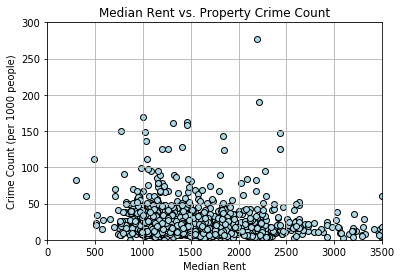

In [235]:
#Property Crime Scatterplot
y = finalpc["Count"]
x = finalpc["Median Rent 2016"]
plt.scatter(x, y, c = 'lightblue', edgecolors = "black")
plt.xlabel("Median Rent")
plt.ylabel("Crime Count (per 1000 people)")
plt.title(f"Median Rent vs. Property Crime Count")
plt.xlim(0,3500)
plt.ylim(0,300)
plt.grid(True)

In [220]:
x = finalvc["Count"]
y = finalvc["Median Rent 2016"]

np.cov(x,y)

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(x, y)
covariance_matrix

# Extract covariance of latitude and Max Temperature
pol_lav_covariance = covariance_matrix[0,1]
pol_lav_covariance

if (pol_lav_covariance < 0):
   print(f"The covariance for violent crime and median rent is 
         {round(pol_lav_covariance,4)}, and is negative. 
         \nThis states that as one variable increases, the other decreases.")
else:
   print(f"The covariance for violent crime and median rent is 
         {round(pol_lav_covariance,4)}, is positive. \nThis 
         states that these variable tend to either increase or decrease together.")

The covariance for violent crime and median rent is -1426.4533, and is negative. 
This states that as one variable increases, the other decreases.


In [240]:
x = finalvc["Count"]
y = finalvc["Median Rent 2016"]

def pearson_r(x, y):

   # Compute correlation matrix: corr_mat
   corr_mat = np.corrcoef(x, y)

   # Return entry [0,1]
   return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(x, y)

# Print the result
print(r)

if (r < 0):
   print(f"Since r = {round(r,4)}, is negative; as one variable increases, the other decreases.")
   if(r <= -0.75):
       print(f"Since r = {round(r,4)} is close to -1; There is a strong inverse relationship between these two variables.")
if (r > 0):
   print(f"Since r = {round(r,4)}, is positive; both variables increase together, or decrease together.")
   if (r >= 0.75):
       print(f"Since r = {round(r,4)} is close to 1; There is a strong positive relationship between these two variables.")
   else:
       print("There is a weak or no association between both variables.")

-0.2532878470834497
Since r = -0.2533, is negative; as one variable increases, the other decreases.


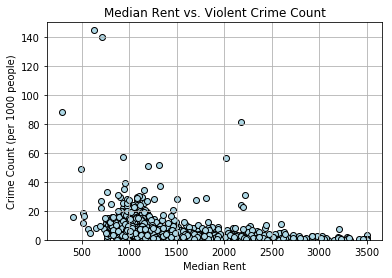

In [234]:
#Violent Crime ScatterPlot
x = finalvc["Count"]
y = finalvc["Median Rent 2016"]
plt.scatter(y, x, c = 'lightblue', edgecolors = "black")
plt.xlabel("Median Rent")
plt.ylabel("Crime Count (per 1000 people)")
plt.title(f"Median Rent vs. Violent Crime Count")
plt.ylim(0,150)
plt.grid(True)